In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dict = pd.read_excel('e_commerce_dataset.xlsx', sheet_name='Data Dict', skiprows=1)
df_dict = df_dict.drop(columns='Unnamed: 0')
df_dict

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [3]:
df = pd.read_excel('e_commerce_dataset.xlsx', sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


# Data Exploration

In [4]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [5]:
# Columns with nan values
df.columns[df.isna().any()].tolist()

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

In [6]:
# the # of rows with nan values for each column
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Tenure of the customers are on the smaller side (most crowded group is between [0-4]). So, the customers are relatively new

# Churn Analysis

In [8]:
# Number of customers who have not churned
churn_0 = len(df.loc[df['Churn']==0])
churn_1 = len(df.loc[df['Churn']==1])
print(f'Number of customers who have not churned: {churn_0}')
print(f'Number of customers who have churned: {churn_1}')

Number of customers who have not churned: 4682
Number of customers who have churned: 948


In [9]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

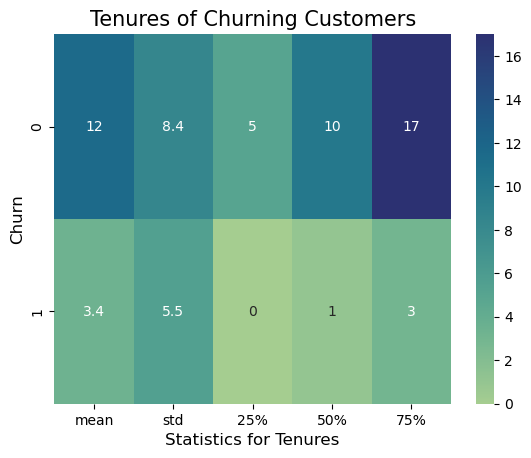

In [10]:
df_churn_tenure = df.groupby('Churn').describe().reset_index()['Tenure']
sns.heatmap(df_churn_tenure[['mean', 'std', '25%', '50%', '75%']], annot=True, cmap="crest")

plt.title('Tenures of Churning Customers', fontsize = 15)
plt.xlabel('Statistics for Tenures', fontsize = 12)
plt.ylabel('Churn', fontsize = 12) # y-axis label with fontsize 15

plt.show()

Tenure of customers grouped by churn. By comparing 25%, 50%, and 75% of the data, we can say that new customers churned more than old customers  

# Group Customers Based on Tenure

In [11]:
# Function to group tenures
def group_tenure(tenure, limit_lower, limit_upper):
    if tenure >= limit:
        range_tenure = f'{limit_lower}-{limit_upper}'
    else:
        lower_bound = (tenure // 5) * 5
        upper_bound = lower_bound + 4
        range_tenure = f'{lower_bound}-{upper_bound}'     
    return range_tenure

In [12]:
# Customers grouped by Tenure (time passed since the company got this customer)
df_tenure = pd.DataFrame(df.groupby(by='Tenure').count(), columns=['CustomerID']).reset_index()
df_tenure

,Tenure,CustomerID
0,0.0,508
1,1.0,690
2,2.0,167
3,3.0,195
4,4.0,203
5,5.0,204
6,6.0,183
7,7.0,221
8,8.0,263
9,9.0,247


In [13]:
df_tenure['Per_of_customers'] = df_tenure['CustomerID'].apply(lambda x: (x/sum(df_tenure['CustomerID']))*100)
df_tenure

,Tenure,CustomerID,Per_of_customers
0,0.0,508,9.467015
1,1.0,690,12.858740
2,2.0,167,3.112188
3,3.0,195,3.633992
4,4.0,203,3.783079
5,5.0,204,3.801714
6,6.0,183,3.410362
7,7.0,221,4.118524
8,8.0,263,4.901230
9,9.0,247,4.603056


In [14]:
# Copy df_tenure to not change the original data
df_grouped = df_tenure.copy()
                   
# Groupby tenure
df_grouped = df_grouped.groupby('Tenure').sum().reset_index()

# Modify df for plot, group tenures with a group of five ex. [0-4], [5-9], and put tenures after 30 to the same group 
limit, max_tenure = 30.0, max(df_tenure['Tenure'])
df_grouped['Tenure'] = df_grouped['Tenure'].apply(group_tenure, limit_lower=limit, limit_upper=max_tenure)
df_grouped['Tenure_groups'] = df_grouped['Tenure'].apply(lambda x: float(x.split('-')[0]))

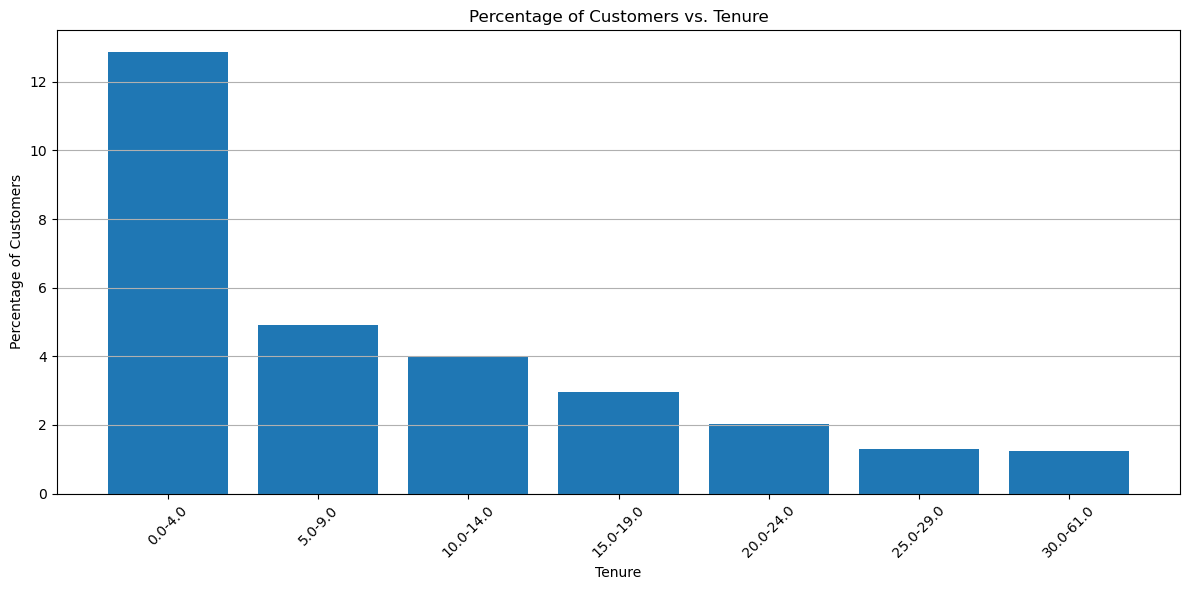

In [15]:
# Creating the bar plot for the grouped data
plt.figure(figsize=(12, 6))
plt.bar(df_grouped['Tenure'], df_grouped['Per_of_customers'])
plt.title('Percentage of Customers vs. Tenure')
plt.xlabel('Tenure')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()